# Punto #1 

#### En la siguiente imagen se logra visualizar en 3D la región de soluciones posibles. Además en rojo se ve el punto optimo encontrado. La grafica coincide con la interpretacion geometrica pues corresponde a un vertice de la región. Más allá de eso, se observa que se encuentra en el primer octante (xi >= 0).

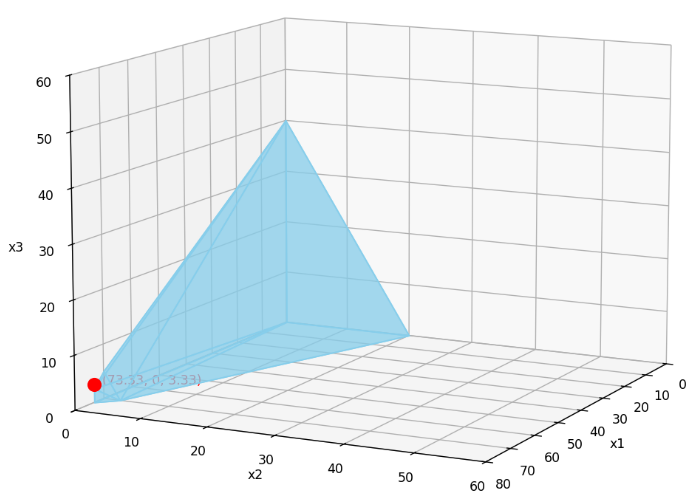

#### A manera de analisis basico de sensibilidad se encuentra que x1 es mucho mayor que x2 y que x3 porque es la variable de decision que tiene un coeficiente grande en la funcion objetivo y los mas pequeños en las restricciones. 

#### Evaluando esto para un caso pequeño, donde se busca maximizar alpha * x1 y la unica restricción es beta * x1 <= 100, si se quisiera encontrar alpha y beta tal que la función se hiciera mayor se preferiría un alpha muy grande y un beta muy pequeño. La ponderación entre estos dos coeficientes hace que se le de preferencia a algunas variables de decisión sobre otras.

In [1]:
from tabulate import tabulate


def mostrarTabla(M, funcion, iteracion, n_var, n_eq):
    headers = (
        [f"x{i+1}" for i in range(n_var)] + [f"s{i+1}" for i in range(n_eq)] + ["b"]
    )
    print("Iteracion #" + str(iteracion))
    print(tabulate(M, headers=headers, tablefmt="fancy_grid"))
    print("Función objetivo:")
    print(tabulate([funcion], headers=headers, tablefmt="fancy_grid"))


def simplex(f, A, b):
    n_var = len(f)
    n_eq = len(b)

    M = []
    for i in range(n_eq):
        row = A[i] + [0] * n_eq + [b[i]]
        row[n_var + i] = 1
        M.append(row)

    funcion = [-x for x in f] + [0] * n_eq + [0]

    it = 1
    while True:
        index_to_loose = 0
        for j in range(1, len(funcion) - 1):
            if funcion[j] < funcion[index_to_loose]:
                index_to_loose = j

        if funcion[index_to_loose] >= 0:
            break

        index_to_tighten = None
        valueMin = 1e9
        for i in range(n_eq):
            if M[i][index_to_loose] > 0:
                if M[i][-1] / M[i][index_to_loose] < valueMin:
                    valueMin = M[i][-1] / M[i][index_to_loose]
                    index_to_tighten = i

        pivot_val = M[index_to_tighten][index_to_loose]
        M[index_to_tighten] = [x / pivot_val for x in M[index_to_tighten]]

        for i in range(n_eq):
            if i != index_to_tighten:
                ratio = M[i][index_to_loose]
                M[i] = [
                    M[i][j] - ratio * M[index_to_tighten][j] for j in range(len(M[0]))
                ]

        ratio = funcion[index_to_loose]
        funcion = [
            funcion[j] - ratio * M[index_to_tighten][j] for j in range(len(funcion))
        ]

        mostrarTabla(M, funcion, it, n_var, n_eq)
        it += 1

    sol = [0] * n_var
    for j in range(n_var):
        fila_donde_hay_var = -1

        for i in range(n_eq):
            if M[i][j] == 1 and all(M[k][j] == 0 for k in range(n_eq) if k != i):
                fila_donde_hay_var = i
                break

        if fila_donde_hay_var != -1:
            sol[j] = M[fila_donde_hay_var][-1]  # igual a valor libre

    print("Maximo: " + str(funcion[-1]))

    for i in range(n_var):
        print("x[" + str(i + 1) + "] = " + str(sol[i]))


# Para el presente programa se considera la ecuación Ax <= b.
# f representa los coeficientes de la funcion a maximizar
# de forma que el producto interno entre f y x, da el valor maximo.

# La implementación está basada en la explicación de simplex presente en
# https://www.youtube.com/watch?v=E72DWgKP_1Y
# por lo que los nombres de variables corresponden a tight/loose en lugar de
# basicas (y no), obedeciendo a nombres representativos frente a la interpretacion
# geometrica conversada en clase.

f = [3, 2, 5]

A = [[1, 1, 1], [2, 1, 1], [1, 4, 2]]
b = [100, 150, 80]

simplex(f, A, b)


Iteracion #1
╒══════╤══════╤══════╤══════╤══════╤══════╤═════╕
│   x1 │   x2 │   x3 │   s1 │   s2 │   s3 │   b │
╞══════╪══════╪══════╪══════╪══════╪══════╪═════╡
│  0.5 │   -1 │    0 │    1 │    0 │ -0.5 │  60 │
├──────┼──────┼──────┼──────┼──────┼──────┼─────┤
│  1.5 │   -1 │    0 │    0 │    1 │ -0.5 │ 110 │
├──────┼──────┼──────┼──────┼──────┼──────┼─────┤
│  0.5 │    2 │    1 │    0 │    0 │  0.5 │  40 │
╘══════╧══════╧══════╧══════╧══════╧══════╧═════╛
Función objetivo:
╒══════╤══════╤══════╤══════╤══════╤══════╤═════╕
│   x1 │   x2 │   x3 │   s1 │   s2 │   s3 │   b │
╞══════╪══════╪══════╪══════╪══════╪══════╪═════╡
│ -0.5 │    8 │    0 │    0 │    0 │  2.5 │ 200 │
╘══════╧══════╧══════╧══════╧══════╧══════╧═════╛
Iteracion #2
╒══════╤═══════════╤══════╤══════╤═══════════╤═══════════╤══════════╕
│   x1 │        x2 │   x3 │   s1 │        s2 │        s3 │        b │
╞══════╪═══════════╪══════╪══════╪═══════════╪═══════════╪══════════╡
│    0 │ -0.666667 │    0 │    1 │ -0.333333 │